In [1]:
import numpy as np
import pandas as pd
from data_preprocessing import KMeansDimensionalityReduction
import model_evaluator
from model_evaluator import metrics_function
import data_import
import sklearn.metrics as metrics

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [9]:
# Import data
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test("Contagio")

## Comparison best features

In [10]:
df_ben = df_tot[df_tot['malware'] == False]
df_mal = df_tot[df_tot['malware'] == True]

ben = np.array(df_ben.sum())
mal = np.array(df_mal.sum())

#print(ben)
#print(mal)

diff = np.abs(ben - mal)
summ = np.abs(ben + mal)
#print(summ)
#print(summ)

rate = np.array(diff / summ)
#print(rate)

df_rate_uns = pd.Series(rate, index=list(df_tot.columns)).drop("malware")
#print(df_rate_uns)
df_rate = df_rate_uns.sort_values(ascending=False)
df_rate_rev = df_rate_uns.sort_values()
print(df_rate)

/Colors          1.000000
/RichMedia       1.000000
/XFA             0.988604
/ObjStm          0.971428
/JBIG2Decode     0.969095
/OpenAction      0.848678
/AA              0.830323
/JavaScript      0.773956
endstream        0.768453
stream           0.767761
/JS              0.758707
endobj           0.742549
obj              0.741606
/Page            0.594955
/Encrypt         0.480315
/AcroForm        0.357867
startxref        0.288893
xref             0.188899
/EmbeddedFile    0.160116
trailer          0.133669
/Launch          0.108434
dtype: float64


In [15]:
for i in range(1, 22):
    columns = list(df_rate[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    print("i = " + str(i))
    if i == 14:
        print(columns)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")

i = 1
0.7090612951738317
0.0
0.5492602359707114
-------------------------------------
i = 2
0.7090612951738317
0.0
0.5492602359707114
-------------------------------------
i = 3
0.7090612951738317
0.0
0.5492602359707114
-------------------------------------
i = 4
0.7812875549070069
14.6
0.694492412690751
-------------------------------------
i = 5
0.784139272975396
15.8
0.6997375980808292
-------------------------------------
i = 6
0.8890295581740488
349.2
0.8844573943403715
-------------------------------------
i = 7
0.8899989980404481
342.0
0.8851502186703067
-------------------------------------
i = 8
0.9909422892641929
20.8
0.9900539019826589
-------------------------------------
i = 9
0.9949953237045026
13.2
0.9945071551970825
-------------------------------------
i = 10
0.9957619951735136
11.2
0.9953484331372848
-------------------------------------
i = 11
0.996171574760672
8.6
0.9957938919249392
-------------------------------------
i = 12
0.9957881794112987
5.0
0.99534820048975

Da battere i = 14: 0.9956 4.0 0.9951

['/Colors', '/RichMedia', '/XFA', '/ObjStm', '/JBIG2Decode', '/OpenAction', '/AA', '/JavaScript', 'endstream', 'stream', '/JS', 'endobj', 'obj', '/Page']

In [13]:
df_tot[['/Colors', '/RichMedia', '/XFA', '/ObjStm', '/JBIG2Decode', '/OpenAction', '/AA', '/JavaScript', 'endstream', 'stream', '/JS', 'endobj', 'obj', '/Page']].head()

,/Colors,/RichMedia,/XFA,/ObjStm,/JBIG2Decode,/OpenAction,/AA,/JavaScript,endstream,stream,/JS,endobj,obj,/Page
0,0,0,0,9,0,0,0,0,160,160,0,217,217,7
1,0,0,0,0,0,0,115,1,143,143,1,351,351,2
2,0,0,0,0,0,0,0,0,23,23,0,168,168,4
3,0,0,0,1,0,0,0,0,15,15,0,40,40,4
4,0,0,0,0,0,0,0,0,14,14,0,42,42,2


In [7]:
for i in range(1, 22):
    columns = list(df_rate_uns[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")

i = 1
0.9532347830074045
154.2
0.9498731152642368
-------------------------------------
i = 2
0.9546814482576819
148.2
0.951357602388482
-------------------------------------
i = 3
0.9777818345404065
60.8
0.9757030271483744
-------------------------------------
i = 4
0.9776882895168926
61.2
0.9756040417487208
-------------------------------------
i = 5
0.9862587626628535
27.6
0.9848574256375858
-------------------------------------
i = 6
0.9864841694448891
27.6
0.9851047911798669
-------------------------------------
i = 7
0.9872655413885484
23.8
0.9859461180984959
-------------------------------------
i = 8
0.9869471217824218
25.4
0.9855995957320689
-------------------------------------
i = 9
0.9865510588965816
25.2
0.985154222656661
-------------------------------------
i = 10
0.9868208735321267
23.4
0.9854511666110148
-------------------------------------
i = 11
0.9943887168557761
9.6
0.9938141104642286
-------------------------------------
i = 12
0.9952872850929919
7.8
0.9948037685

In [8]:
for i in range(1, 22):
    columns = list(df_rate_rev[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")

i = 1
0.7091292505313567
0.0
0.5494086773363719
-------------------------------------
i = 2
0.925433931657663
41.8
0.9131072881000423
-------------------------------------
i = 3
0.9254916250956112
41.2
0.9131567685552625
-------------------------------------
i = 4
0.9254916250956112
41.2
0.9131567685552625
-------------------------------------
i = 5
0.9300301868243104
20.0
0.9180556887156524
-------------------------------------
i = 6
0.9300201808674284
19.0
0.9180062082604319
-------------------------------------
i = 7
0.9294882388544268
22.2
0.9174618252961573
-------------------------------------
i = 8
0.9387291341772144
53.4
0.9299808580065216
-------------------------------------
i = 9
0.9860092244335188
30.2
0.9846101825413707
-------------------------------------
i = 10
0.9860159568956399
29.4
0.9846101825413707
-------------------------------------
i = 11
0.9962128843264747
10.0
0.9958432621787001
-------------------------------------
i = 12
0.994835940628384
9.2
0.994309000728

## Comparison of Kfold uses
Without Kfold is better

In [18]:
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test('Contagio')
KMDimRed = KMeansDimensionalityReduction(df_tot)
df_tot_km, X_tot_km, X_train_km = KMDimRed.fit_ben_mal_kmeans(df_tot, X_tot, X_train)
X_test_km = KMDimRed.transform_ben_mal_kmeans(X_test)

In [19]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9973549146821374
3.8


In [20]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_km, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9961705349653489
7.0


## Comparison of random_state = 0

In [43]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9973549146821374
3.8


In [47]:
clf = DecisionTreeClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9977482211373087
3.6


without random_state=0 result can change, wor

## Testing criterion

In [6]:
for crit in ["gini", "entropy", "log_loss"]:
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("criterion " + crit)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

criterion gini
0.9973549146821374
3.8
0.9970927898195804
-----------------
criterion entropy
0.9973549146821374
3.8
0.9970927898195804
-----------------
criterion log_loss
0.9973549146821374
3.8
0.9970927898195804
-----------------


## Testing splitter

In [7]:
for spli in ["best", "random"]:
    clf = DecisionTreeClassifier(random_state=0, splitter=spli)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("splitter " + spli)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

splitter best
0.9973549146821374
3.8
0.9970927898195804
-----------------
splitter random
0.996904594075507
4.8
0.9965980273390462
-----------------


## Testing max_depth

In [ ]:
for m in range(2,30,2):
    clf = DecisionTreeClassifier(random_state=0, max_depth=m)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    kfold_scores_npv = metrics_function(y_test, y_pred)
    
    print("max_depth " + str(m))
    print(kfold_scores_npv['f1_score'])
    print(kfold_scores_npv['false_neg'])
    print(kfold_scores_npv['accuracy_score'])
    print("-----------------")

max_depth 2
0.9920832390861797
27
0.9913409203364671
-----------------
max_depth 4
0.9975219644063978
6
0.9972785749628896
-----------------
max_depth 6
0.9979743416610398
3
0.9977733795150915
-----------------
max_depth 8
0.9984237784282819
3
0.9982681840672935
-----------------
max_depth 10
0.9977477477477478
5
0.9975259772389906
-----------------
max_depth 12
0.9975230803873003
5
0.9972785749628896
-----------------
max_depth 14
0.9975230803873003
5
0.9972785749628896
-----------------
max_depth 16
0.9977477477477478
5
0.9975259772389906
-----------------
max_depth 18
0.9977477477477478
5
0.9975259772389906
-----------------
max_depth 20
0.9977477477477478
5
0.9975259772389906
-----------------
max_depth 22
0.9977477477477478
5
0.9975259772389906
-----------------
max_depth 24
0.9977477477477478
5
0.9975259772389906
-----------------
max_depth 26
0.9977477477477478
5
0.9975259772389906
-----------------
max_depth 28
0.9977477477477478
5
0.9975259772389906
-----------------


Best max_depth 8

## Conclusion

In [20]:
columns = list(df_rate[:14].index)
y_train_cust = np.array(df_tot["malware"])
X_train_cust = np.array(df_tot[columns])

clf = DecisionTreeClassifier(random_state=0, max_depth=8)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
print("Train score")
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)
print(sum(kfold_scores_npv['test_accuracy_score'])/5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
kfold_scores_npv = metrics_function(y_test, y_pred)
print("\nTest score")
print(kfold_scores_npv['f1_score'])
print(kfold_scores_npv['false_neg'])
print(kfold_scores_npv['accuracy_score'])

Train score
0.9956965823402619
7.0
0.9952492518239259

Test score
0.9984237784282819
3
0.9982681840672935


Without random_state I can't be under 4.0 _sperimentally_

## Plot Tree

|--- /JS <= 0.50
|   |--- /XFA <= 0.50
|   |   |--- startxref <= 0.50
|   |   |   |--- class: True
|   |   |--- startxref >  0.50
|   |   |   |--- /Launch <= 0.50
|   |   |   |   |--- /JavaScript <= 0.50
|   |   |   |   |   |--- /Colors <= 0.50
|   |   |   |   |   |   |--- /AA <= 0.50
|   |   |   |   |   |   |   |--- /EmbeddedFile <= 8.50
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- /EmbeddedFile >  8.50
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- /AA >  0.50
|   |   |   |   |   |   |   |--- obj <= 18.00
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- obj >  18.00
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- /Colors >  0.50
|   |   |   |   |   |   |--- class: True
|   |   |   |   |--- /JavaScript >  0.50
|   |   |   |   |   |--- endobj <= 29.00
|   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- endobj >  29.00
|   |   |   |   |   |   |-

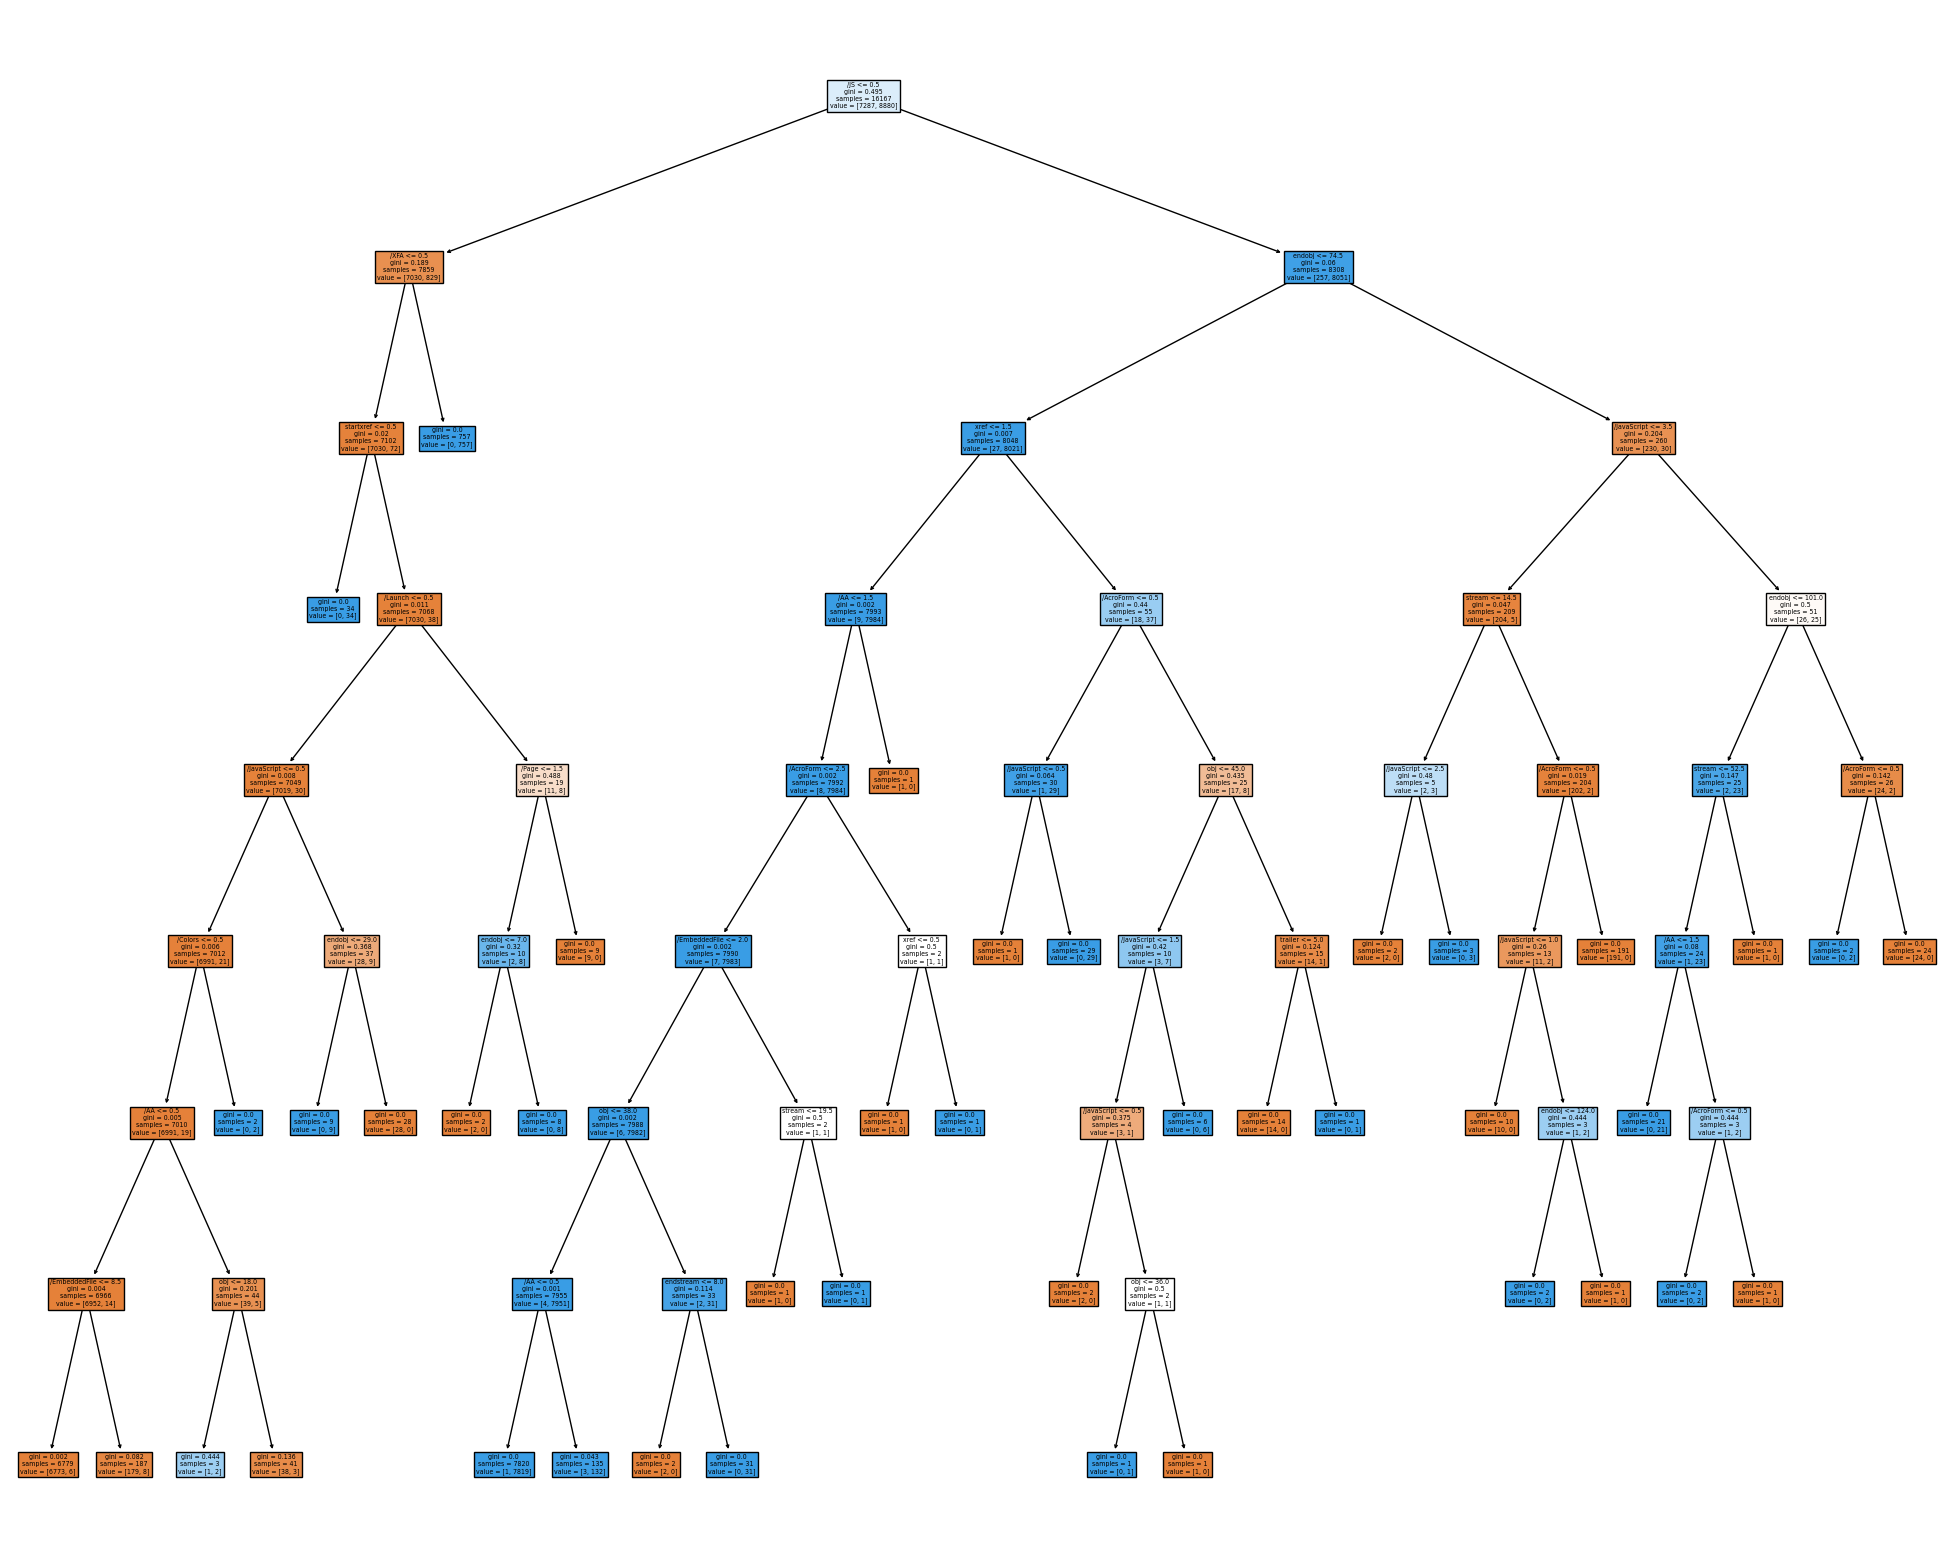

In [17]:
#clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
#kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)

text_representation = tree.export_text(clf, feature_names=list(df_tot.columns)[:-1])
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=list(df_tot.columns)[:-1], filled=True)
plt.show()
fig.savefig("decistion_tree.png")